In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm , classification_report as cr
import tensorflow_hub as hub
import PIL
import random

In [3]:
mob=keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layers in mob.layers:  # Freeze all Trainable Layers
  layers.trainable=False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
data_augmentation=keras.Sequential([
    keras.layers.RandomRotation(0.2),# RandomRotatiion
])

In [6]:
augment=data_augmentation(mob.output) # First layer OF augmentation after PreTrained model layers
drop=keras.layers.Dropout(0.2)(augment)      # DropOut Layer to avoid overfittin
x=keras.layers.Flatten()(drop)               # Flatten Layer to flatten image
prediction=keras.layers.Dense(1,activation='sigmoid')(x) # Final Output Dense layer Having One Neuron and activation is sigmoid
model=keras.models.Model(inputs=mob.input,outputs=prediction) # Define Model with input and output layer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile Model | Optimizer : Adam
                                                                                                # loss : Binary Crossentropy (binary Classification)
                                                                                                # Metrics : Accuracy
model.summary() # Model Summary

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,320,705 (8.85 MB)

 Trainable params: 62,721 (245.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data_url="/content/drive/MyDrive/DatasetPND"
data_dir=pathlib.Path(data_url)

In [9]:
image_dict={
    'Pneumonia':list(data_dir.glob("pneumonia/*")), # Safe Images Path List
    'Normal':list(data_dir.glob("normal/*")) # Violent Images Path List
}
labels_dict={
    'Pneumonia':0, # Safe Images Label
    'Normal':1, # Violent Images Label
}

In [10]:
x=[]
y=[]
for label_name , images in image_dict.items():
    for image in images:
        img=cv2.imread(image)
        x.append(img)
        y.append(labels_dict[label_name])

Text(0.5, 1.0, 'Distribution Between the Classes')

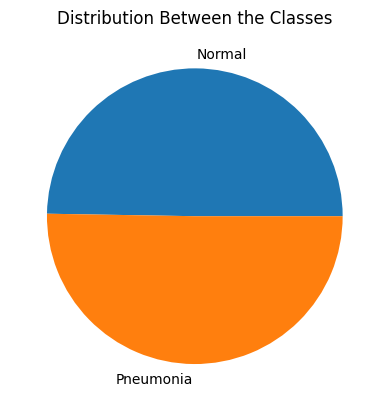

In [12]:
man=len(image_dict['Normal'])
women=len(image_dict['Pneumonia'])
plt.pie([man,women],labels=['Normal','Pneumonia'])
plt.title("Distribution Between the Classes")

In [13]:
y=np.array(y)
x=np.array(x)
x.shape,y.shape

((3181, 224, 224, 3), (3181,))

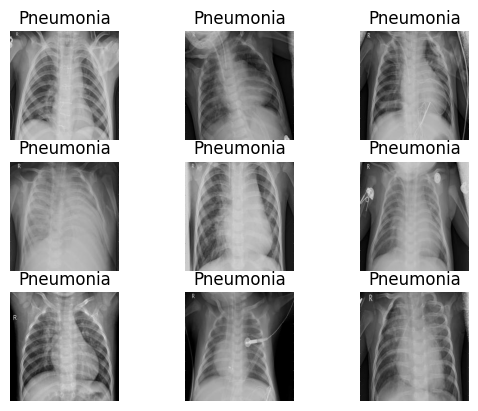

In [15]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(1,1000)])
  plt.axis('off')
  plt.title("Pneumonia")

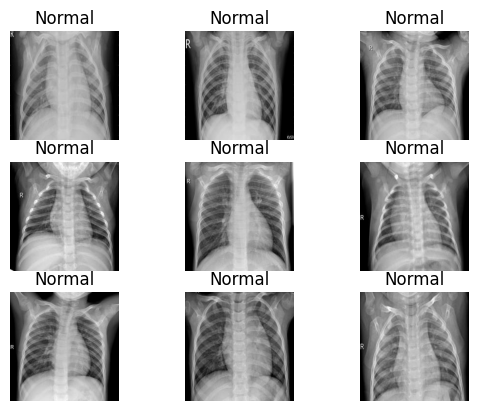

In [16]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(1700,2000)])
  plt.axis('off')
  plt.title("Normal")

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2226, 224, 224, 3), (955, 224, 224, 3), (2226,), (955,))

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.8330 - loss: 0.7342
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9195 - loss: 0.4262
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9531 - loss: 0.1737
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9647 - loss: 0.1888
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9708 - loss: 0.1072
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9727 - loss: 0.0740
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9700 - loss: 0.1023
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9719 - loss: 0.1262
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9778 - loss: 0.0829
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9748 - loss: 0.1007


In [20]:
model.evaluate(x_test,y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9257 - loss: 0.6587


[0.6146482229232788, 0.9235602021217346]

<BarContainer object of 4 artists>

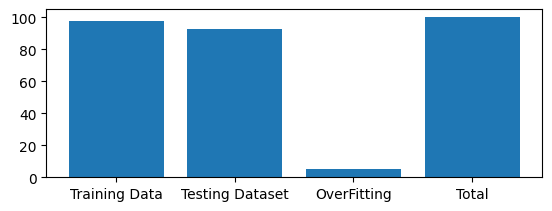

In [36]:
plt.subplot(2,1,2)
plt.bar(['Training Data','Testing Dataset','OverFitting','Total'],[97.48,92.57,4.91,100])

In [21]:
prediction=model.predict(x_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [22]:
threshold=0.5
preds=[]
for i in prediction:
  if(i>threshold):
    preds.append(1)
  else:
    preds.append(0)
preds[:10],y_test[:10]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1]))

In [23]:
print(cr(y_test,preds,target_names=['Pneumonia','Normal']))

              precision    recall  f1-score   support

   Pneumonia       0.88      0.99      0.93       489
      Normal       0.99      0.85      0.92       466

    accuracy                           0.92       955
   macro avg       0.93      0.92      0.92       955
weighted avg       0.93      0.92      0.92       955



<Axes: >

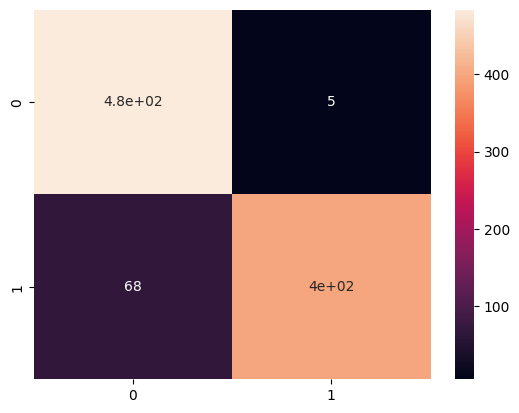

In [24]:
cmm=(cm(y_test,preds))
sb.heatmap(cmm,annot=True)

In [25]:
model.save("saved_model.keras")